<a href="https://colab.research.google.com/github/keshari112k/HDSC_2022_Stage_B_tag_alog_proj/blob/main/HDSC_2022_Stage_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [288]:
path = '/content/drive/MyDrive/ HDSC2022/ Stage B/energydata_complete.csv'
df = pd.read_csv(path)

In [289]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [290]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [291]:
df.shape

(19735, 29)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [293]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [294]:
df.duplicated().sum()

0

In [295]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

# Dropping Date and Lights

In [296]:
df.drop(columns = ['date','lights'],inplace = True)

In [297]:
print(df.columns)
print(df.shape)

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')
(19735, 27)


In [298]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Univariate analysis

In [299]:
plt.figure(figsize=(5,5))
def univariate_analysis(parameter):
  sns.distplot(df[parameter],color='Y')
  plt.show()

<Figure size 360x360 with 0 Axes>

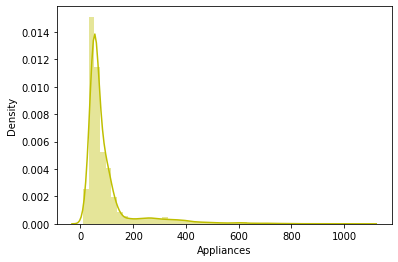

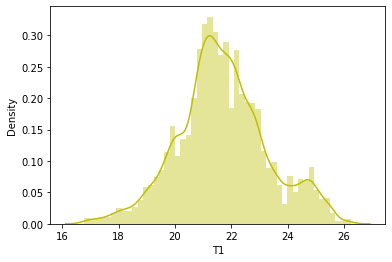

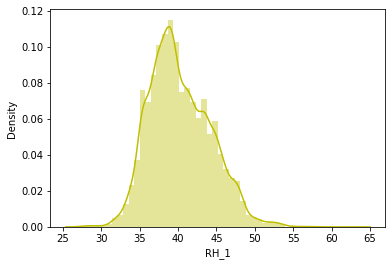

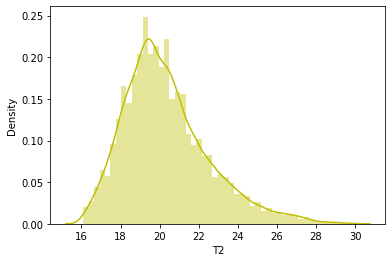

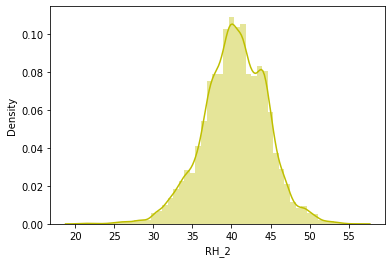

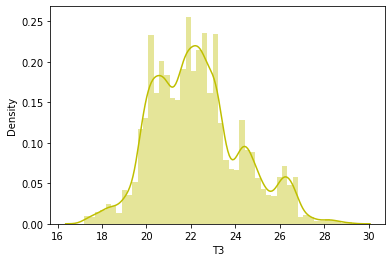

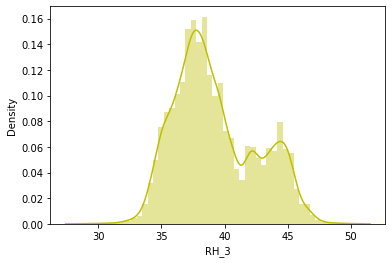

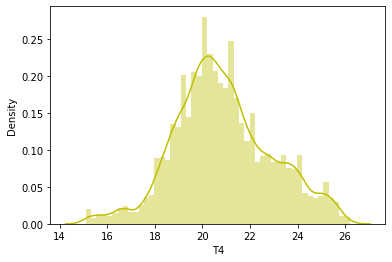

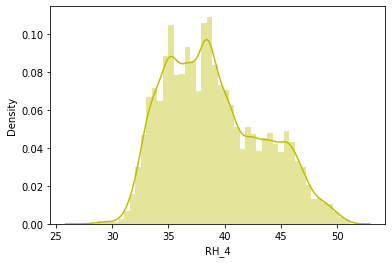

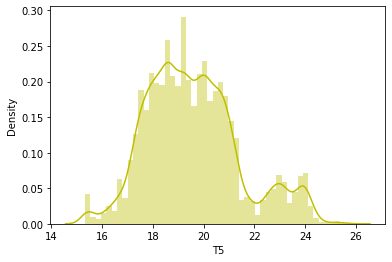

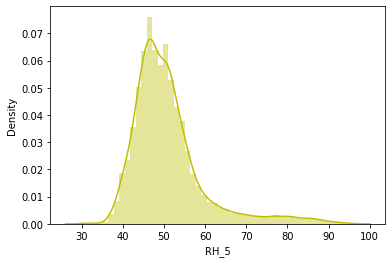

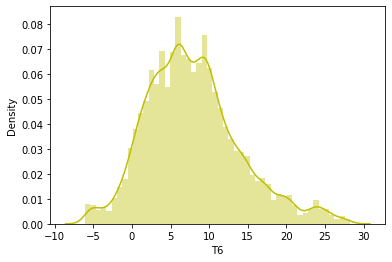

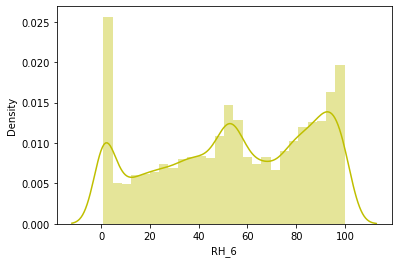

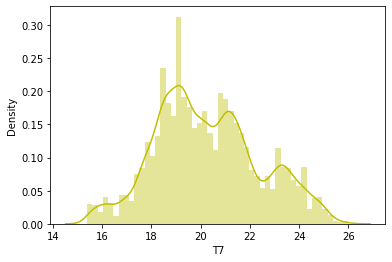

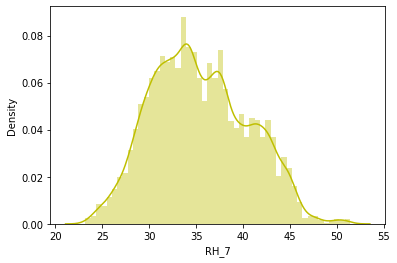

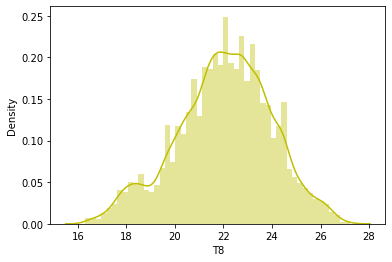

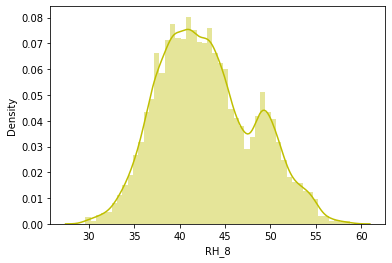

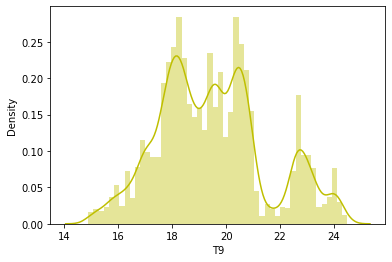

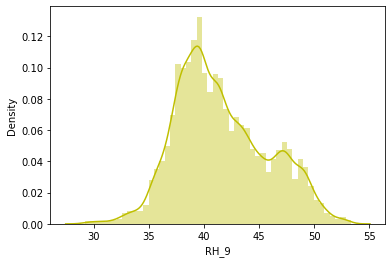

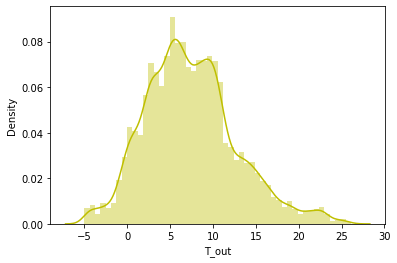

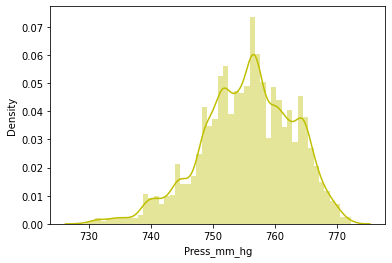

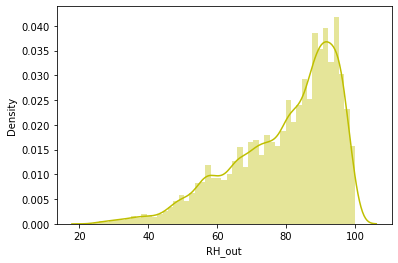

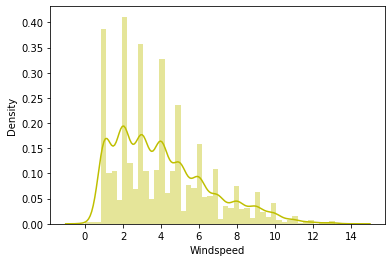

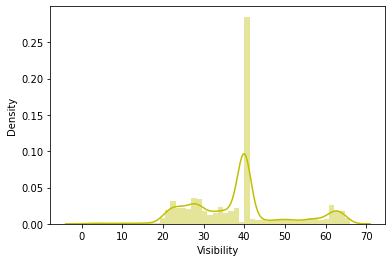

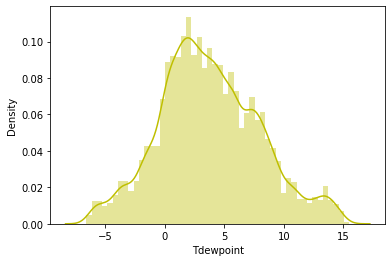

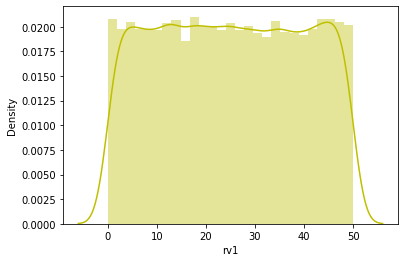

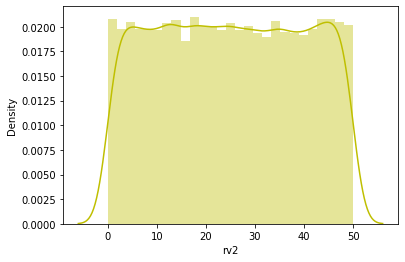

In [300]:
for column in df.columns:
  univariate_analysis(column)

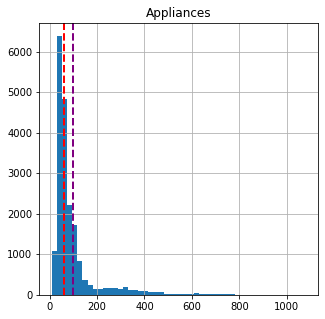

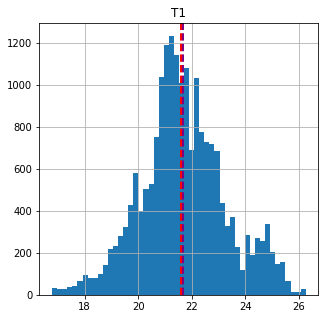

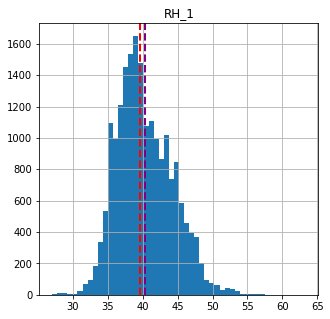

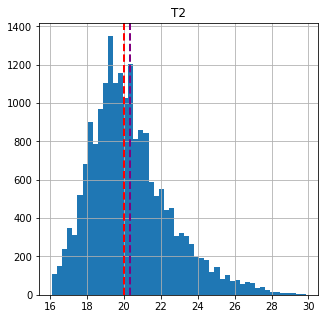

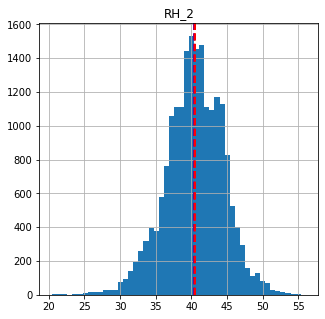

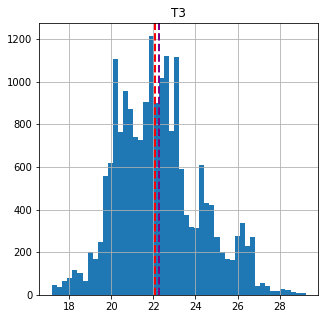

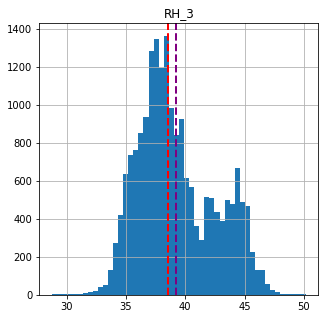

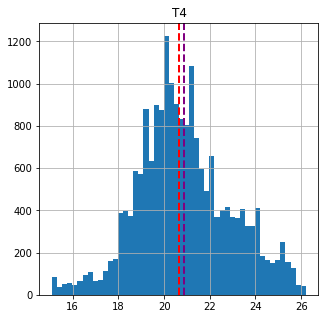

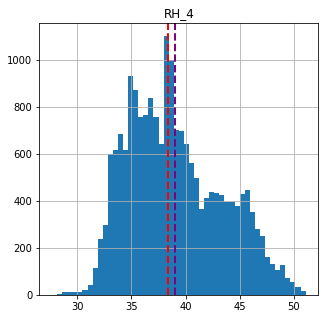

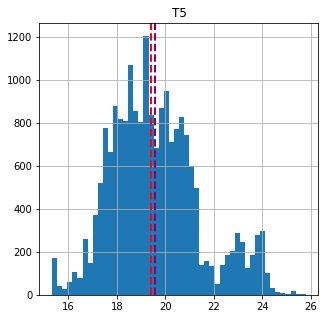

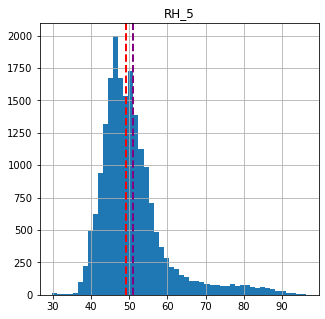

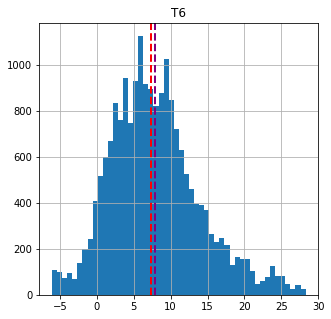

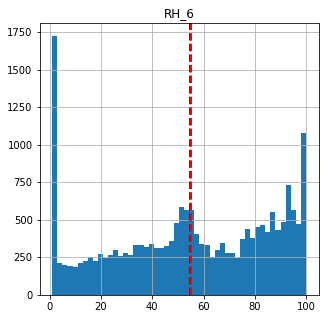

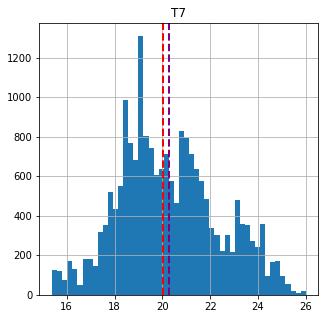

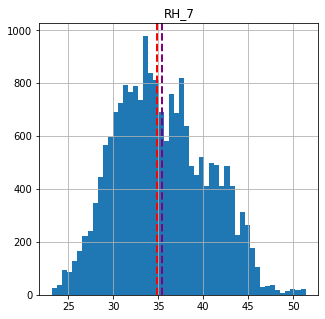

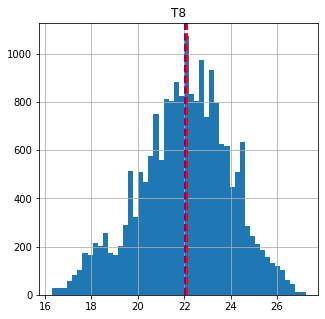

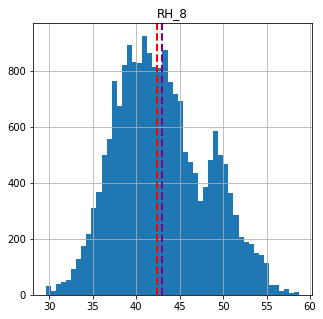

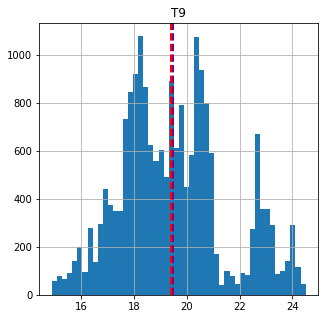

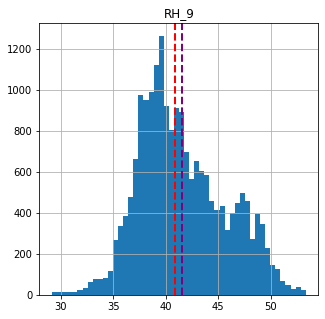

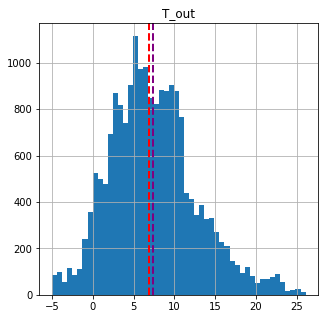

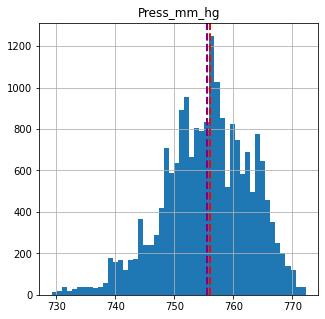

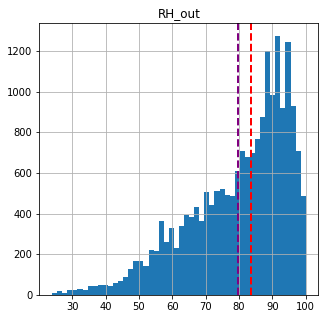

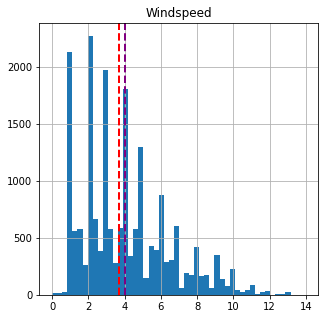

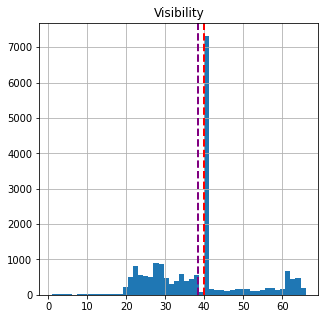

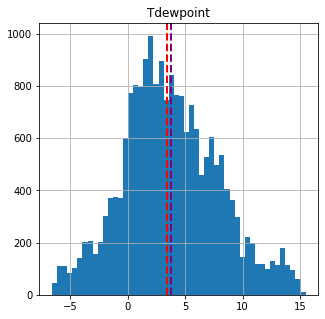

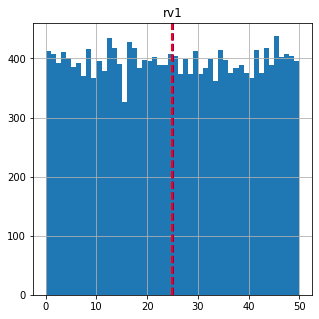

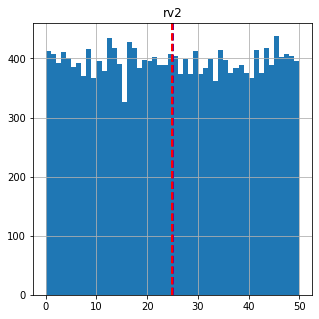

In [301]:
for column in df.columns:
  fig = plt.figure(figsize=(5,5))
  ax = fig.gca()
  feature = df[column]
  feature.hist(bins=50,ax = ax)
  ax.axvline(feature.mean(), color='Purple', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(), color='Red', linestyle='dashed',linewidth=2)
  ax.set_title(column)
plt.show()

# Correlation between Features and Appliances

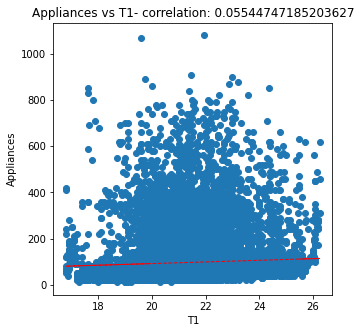

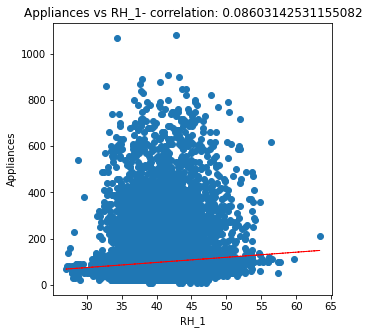

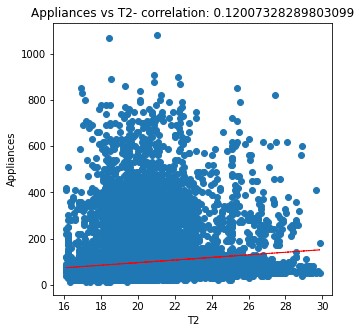

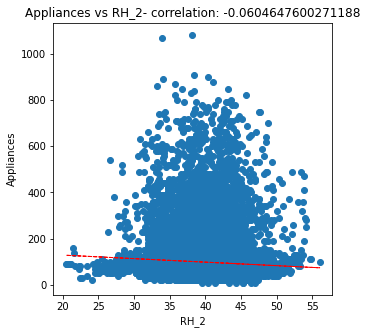

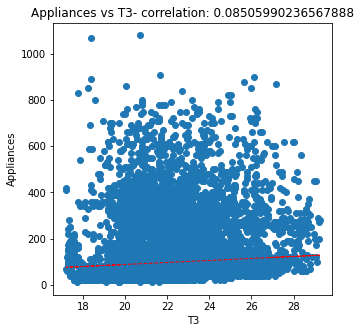

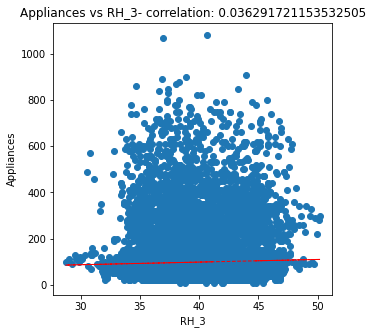

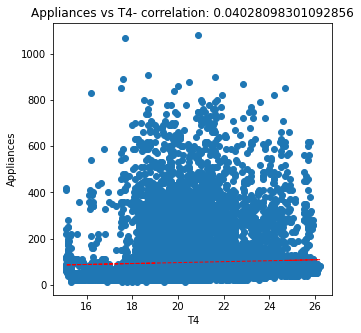

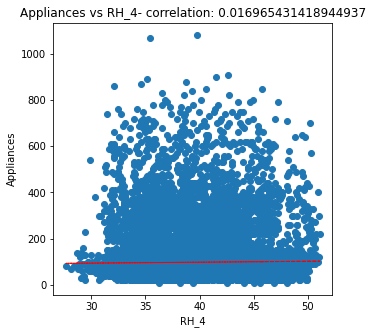

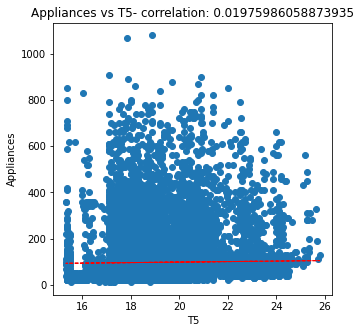

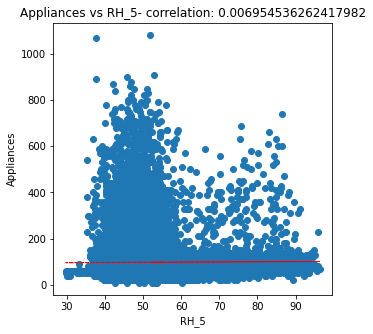

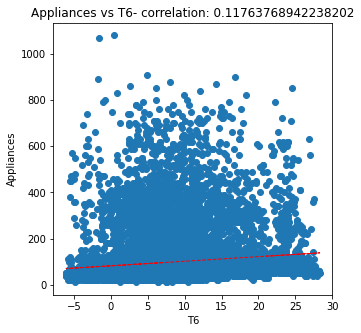

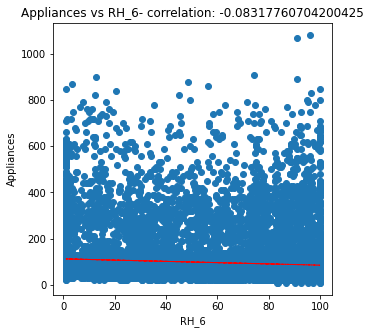

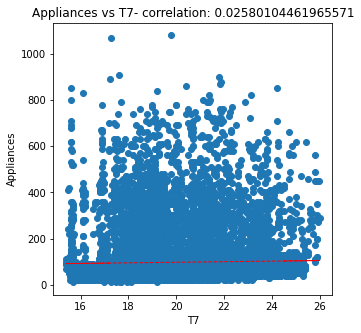

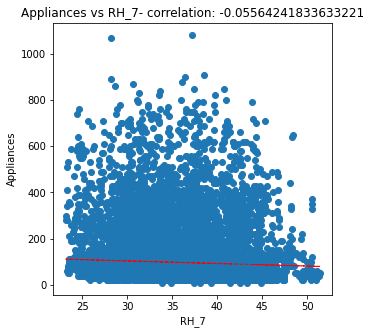

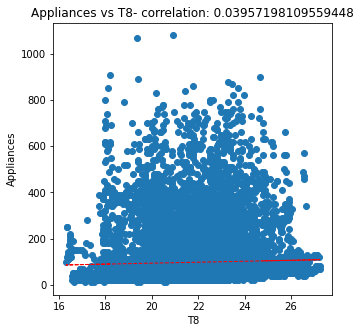

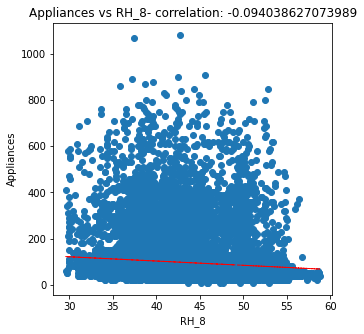

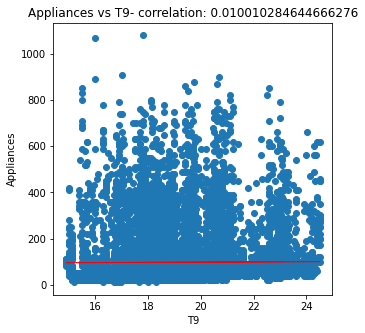

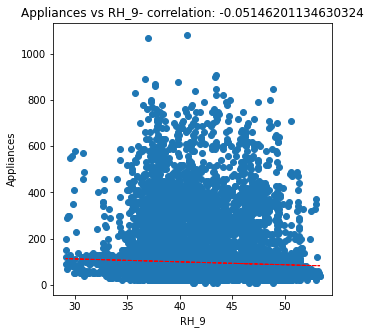

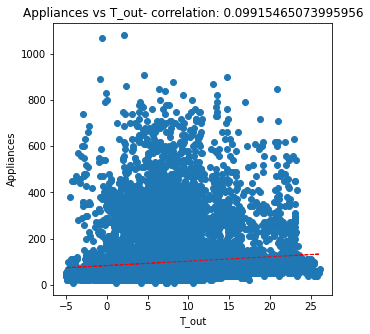

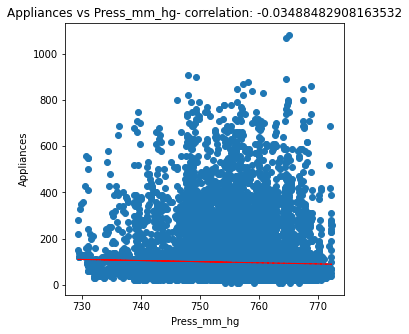

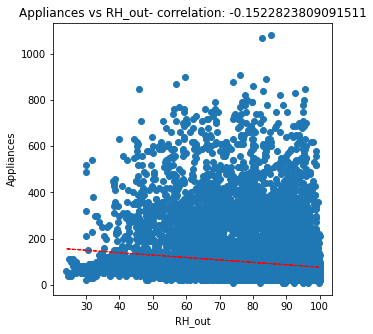

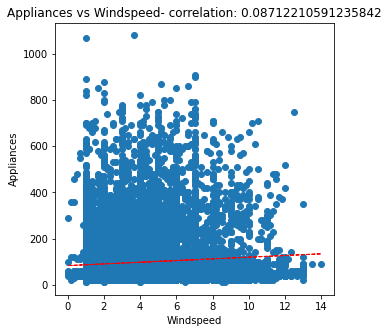

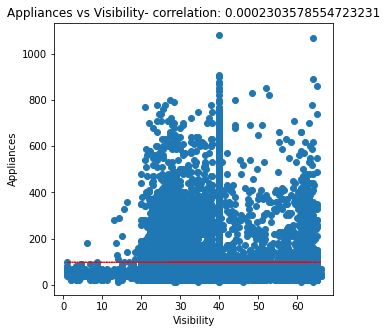

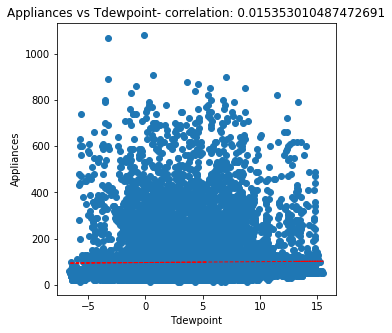

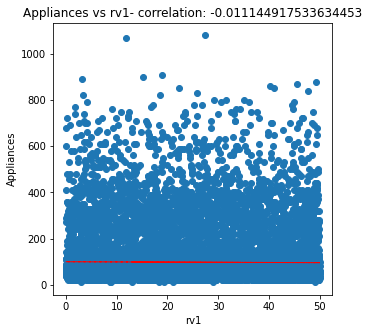

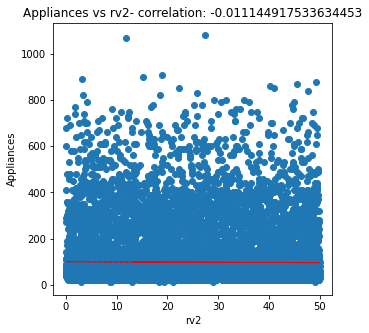

In [302]:
for col in df.columns[1:]:
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# Heatmap 

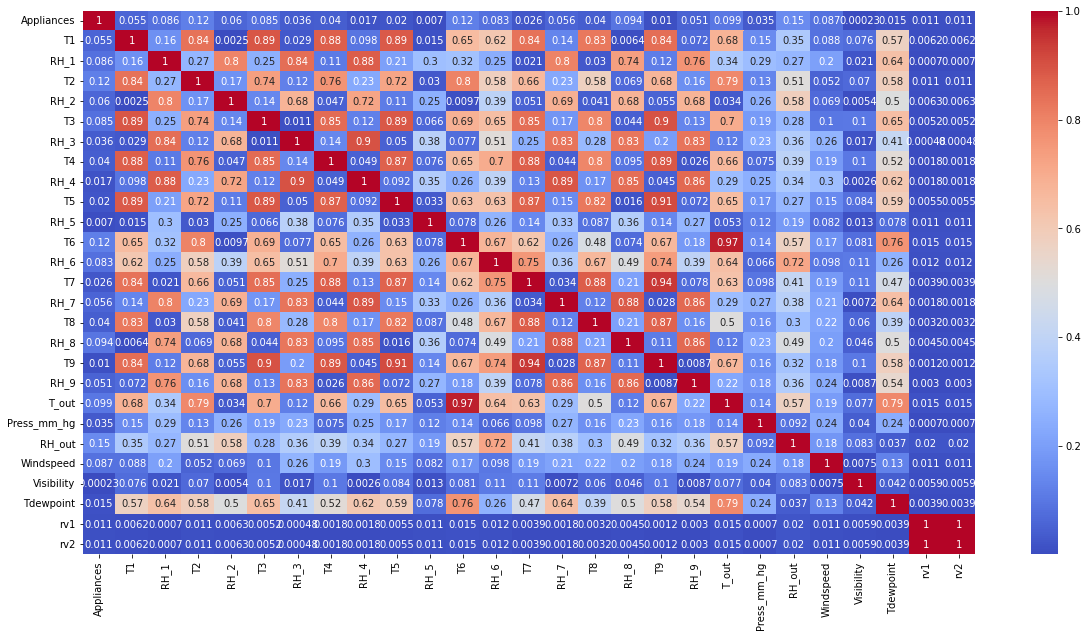

In [303]:
 ## Correlation
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

#**Solutions of the question 12-20**

## **importing required libraries**





In [304]:
#importing required libraries
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


### **12. From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?**

In [305]:
x = df.loc[:,'T2'].values.reshape(-1,1)
y = df.loc[:,'T6'].values.reshape(-1,1)

regressor = LinearRegression()
reg = regressor.fit(x,y)
y_pred = reg.predict(x)
print("R_squared value : ",round(r2_score(y,y_pred),2))

R_squared value :  0.64


###**13. Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:**

### **What is the Mean Absolute Error (in two decimal places)?**

In [306]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(scaled_data,columns=df.columns)
features_df = normalized_df.drop(columns=['Appliances'])
target = normalized_df['Appliances']

In [307]:
normalized_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [308]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3,random_state=42)

#Regression
reg1 = regressor.fit(X_train,y_train)
y_pred = reg1.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error : ",round(mae,2))

mean absolute error :  0.05


### **14. What is the Residual Sum of Squares (in two decimal places)?**






In [309]:
rss = np.sum(np.square(y_test - y_pred))
print("Residual Sum of Squares : ",round(rss,2))

Residual Sum of Squares :  45.35


### **15.What is the Root Mean Squared Error (in three decimal places)?**

In [310]:
print("Root Mean Squared Error : ",round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

Root Mean Squared Error :  0.088


### **16. What is the Coefficient of Determination (in two decimal places)?**



In [311]:
print("Coefficient of Determination : ",round(r2_score(y_test,y_pred),2))

Coefficient of Determination :  0.15


### **17.Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?**

In [312]:
#Ridge Regression (L2 norm)
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
ridge.coef_

array([-0.01840621,  0.5195253 , -0.20139673, -0.41107123,  0.28808681,
        0.0951346 ,  0.02738389,  0.02457853, -0.01985322,  0.01615237,
        0.21729178,  0.03551862,  0.01009781, -0.04597696,  0.10102815,
       -0.15683005, -0.1889163 , -0.04136654, -0.26217227,  0.00658387,
       -0.05472365,  0.03026762,  0.01207649,  0.08312757,  0.00074817,
        0.00074817])

In [313]:
#Lasso Regression (L1 norm)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
lasso_predict = lasso.predict(X_test)
lasso.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [314]:
#feature weight function
def get_weights(reg_model, data_subset, column_name):
  wts = pd.Series(reg_model.coef_, data_subset.columns).sort_values()
  weights_df = pd.DataFrame(wts).reset_index()
  weights_df.columns = ['Features',column_name]

  return weights_df

In [315]:
linear_regressor_wt = get_weights(reg1, X_train, 'Linear_Regression_wt')
ridge_regression_wt = get_weights(ridge, X_train, 'Ridge_Regression_wt(alpha=0.4)')
lasso_regression_wt = get_weights(lasso, X_train, 'Lasso_Regression_wt(alpha=0.001)')

features_wt = linear_regressor_wt.merge(ridge_regression_wt, on='Features').merge(lasso_regression_wt, on='Features').set_index('Features')
features_wt

,Linear_Regression_wt,Ridge_Regression_wt(alpha=0.4),Lasso_Regression_wt(alpha=0.001)
Features,,,
RH_2,-0.456698,-0.411071,-0.000000
T_out,-0.321860,-0.262172,0.000000
T2,-0.236178,-0.201397,0.000000
T9,-0.189941,-0.188916,-0.000000
RH_8,-0.157595,-0.156830,-0.000110
RH_out,-0.077671,-0.054724,-0.049557
RH_7,-0.044614,-0.045977,-0.000000
RH_9,-0.039800,-0.041367,-0.000000
T5,-0.015657,-0.019853,-0.000000


In [316]:
min_wt_in_Linear_regression = features_wt[features_wt['Linear_Regression_wt'] == np.min(features_wt['Linear_Regression_wt'])].index
max_wt_in_Linear_regression = features_wt[features_wt['Linear_Regression_wt'] == np.max(features_wt['Linear_Regression_wt'])].index
print("lowest and highest weights in Linear Regression are of the columns ",min_wt_in_Linear_regression,"and",max_wt_in_Linear_regression,"respectively")


lowest and highest weights in Linear Regression are of the columns  Index(['RH_2'], dtype='object', name='Features') and Index(['RH_1'], dtype='object', name='Features') respectively


### **18.Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?**

In [317]:
print("root mean squared error (RMSE) in Ridge Regression model : ",round(np.sqrt(mean_squared_error(y_test, ridge_predict)),3))

root mean squared error (RMSE) in Ridge Regression model :  0.088


No, There is no change in RMSE value when evaluated on the test set in Ridge Regression model 

### **19.Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?**

In [318]:
lasso_wt_column = features_wt['Lasso_Regression_wt(alpha=0.001)']
non_zero_count  = lasso_wt_column[lasso_wt_column != 0].count()
print("features having non-zero feature weights :",non_zero_count)

features having non-zero feature weights : 4


### **20.What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)**

In [319]:
print("root mean squared error (RMSE) in Lasso Regression model : ",round(np.sqrt(mean_squared_error(y_test, lasso_predict)),3))

root mean squared error (RMSE) in Lasso Regression model :  0.094
